In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries
from pylab import *

Using TensorFlow backend.


In [2]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('bearings.csv', 50, True)

print(X_test)
print(len(X_train))
print(len(y_test))
axis = range(1,len(y_test)+1)

705
[[[  0.        ]
  [ -0.26086957]
  [  0.34782609]
  ..., 
  [  0.69565217]
  [  0.26086957]
  [  0.08695652]]

 [[  0.        ]
  [  0.82352941]
  [  0.47058824]
  ..., 
  [  0.70588235]
  [  0.47058824]
  [  0.35294118]]

 [[  0.        ]
  [ -0.19354839]
  [ -0.12903226]
  ..., 
  [ -0.19354839]
  [ -0.25806452]
  [ -0.38709677]]

 ..., 
 [[  0.        ]
  [  0.        ]
  [ -0.8       ]
  ..., 
  [  1.73333333]
  [  1.6       ]
  [  1.33333333]]

 [[  0.        ]
  [ -0.8       ]
  [ -0.93333333]
  ..., 
  [  1.6       ]
  [  1.33333333]
  [  1.46666667]]

 [[  0.        ]
  [ -0.66666667]
  [ -0.66666667]
  ..., 
  [ 10.66666667]
  [ 11.33333333]
  [ 14.66666667]]]
635
70


In [3]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

('compilation time : ', 0.03196382522583008)


In [4]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=50,
    nb_epoch=1,
    validation_split=0.05)

Train on 603 samples, validate on 32 samples
Epoch 1/1
603/603 [==============================] - 5s 8ms/step - loss: 31.6885 - val_loss: 49.8699


In [5]:
#Step 4 - Plot the predictions!
# predictions = lstm.predict_sequences_multiple(model, X_test, 50, 61)
preds3 = lstm.predict_sequence_full(model, X_test, 50)
preds = lstm.predict_point_by_point(model, X_test)
# preds2 = lstm.predict_sequences_multiple(model, X_test, 20, 20)
preds = 10*preds
# predictions = np.asarray(predictions, dtype=np.float32)
preds3 = np.asarray(preds3, dtype=np.float32)
# predictions = 10 * (predictions[0])
# preds3 = 10*preds3
# lstm.plot_results_multiple(preds, y_test, 5)
# lstm.plot_results_multiple(predictions, y_test, 50)

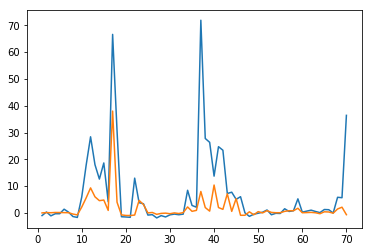

In [6]:
# plot(axis,preds3)
plot(axis,preds)
# print(preds3)
plot(axis,y_test)
show()